### useful functions

In [1]:
from model import *

C:\Users\morta\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\morta\anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:18: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


# Prepare Dataset

In [2]:
names = locals()
for w in ['005','01','015','02']:
    names['dataFile_e2'+str(w)] = '.\Simulator\C_Easy2_noise'+ str(w)+'.mat'
    names['dataFile_e1'+str(w)] = '.\Simulator\C_Easy1_noise'+ str(w)+'.mat'
    names['dataFile_d1'+str(w)] = '.\Simulator\C_Difficult1_noise'+ str(w)+'.mat'
    names['dataFile_d2'+str(w)] = '.\Simulator\C_Difficult2_noise'+ str(w)+'.mat'# path is needed to be changed
    names['data_e1'+str(w)],names['data_e2'+str(w)],names['data_d1'+str(w)],names['data_d2'+str(w)] = scio.loadmat(names['dataFile_e1'+str(w)]),scio.loadmat(names['dataFile_e2'+str(w)]),scio.loadmat(names['dataFile_d1'+str(w)]),scio.loadmat(names['dataFile_d2'+str(w)])
    names['spikes_e1'+str(w)],names['spikes_e2'+str(w)],names['spikes_d1'+str(w)],names['spikes_d2'+str(w)] =  names['data_e1'+str(w)]['data'][0], names['data_e2'+str(w)]['data'][0],names['data_d1'+str(w)]['data'][0],names['data_d2'+str(w)]['data'][0]
    names['index_e1'+str(w)] = names['index_e2'+str(w)] = names['index_d1'+str(w)] = names['index_d2'+str(w)] = np.array(range(len(names['spikes_e2'+str(w)])))
    for i in ['_e1','_e2','_d1','_d2']:
        names['min'+str(i)+str(w)],names['max'+str(i)+str(w)] = names['spikes'+str(i)+str(w)].min(), names['spikes'+str(i)+str(w)].max()
        names['maxvalue'+str(i)+str(w)] = max(abs(names['min'+str(i)+str(w)]),names['max'+str(i)+str(w)])
        names['spikes_nor'+str(i)+str(w)] = (names['spikes'+str(i)+str(w)])/names['maxvalue'+str(i)+str(w)]

## Spike Sorting

In [8]:
## Evaluate for each noise dataset at each noise level
fact = 24
best_scores = []
noise = [0.05,0.1,0.15,0.2]
for ind,w in enumerate(tqdm(['005','01','015','02'])):
    scores_noise= []
    for j in ['e1','e2','d1','d2']:
        spike_times = names['data_'+j+str(w)]['spike_times'][0][0][0]
        signal = names['spikes_'+j+w]
        sigma = np.std(signal)
        signals = list(map(lambda x: signal[x+15:x+40],spike_times))
        features= [feature_extraction(signal,factor('24')) for signal in signals]
        gt = names['data_'+j+str(w)]['spike_class'][0][0][0]
        scores = []
        l1_params ={
            'distance':l2,
            'thresh':thresh_calc(sigma,'24'),
        }
        for loop in range(5):
            l1_score = train_predict(l1_params,features,gt,approx_update,False)
            print(l1_score)
            scores.append(l1_score)

        scores_noise.append(scores)
    best_scores.append(scores_noise)

0.9743954480796586
0.9815078236130867
0.9715504978662873
0.9786628733997155
0.972972972972973
0.9780058651026393
0.9838709677419355
0.9868035190615836
0.9853372434017595
0.9868035190615836
0.9852289512555391
0.9852289512555391
0.9807976366322009
0.9778434268833087
0.9689807976366323
0.9895988112927192
0.9851411589895989
0.9851411589895989
0.9806835066864784
0.974739970282318
0.9829787234042553
0.9858156028368794
0.9858156028368794
0.9773049645390071
0.9872340425531915
0.9829545454545454
0.9829545454545454
0.9786931818181818
0.984375
0.984375
0.9855072463768116
0.946376811594203
0.8289855072463768
0.9826086956521739
0.981159420289855
0.9682539682539683
0.98989898989899
0.9956709956709957
0.9841269841269841
0.9841269841269841
0.9755747126436781
0.9741379310344828
0.9669540229885057
0.9741379310344828
0.8074712643678161
0.9838945827232797
0.9838945827232797
0.986822840409956
0.9897510980966325
0.9838945827232797
0.9755395683453237
0.9597122302158273
0.9366906474820144
0.9798561151079137
0

In [11]:
values = np.mean(np.array
                 (best_scores),axis=2)
stes = (np.std(np.array(best_scores)*100,axis=2).T/np.sqrt(20))[1]


In [15]:
values

array([[0.97581792, 0.98416422, 0.97961595, 0.98306092],
       [0.98382979, 0.98267045, 0.94492754, 0.98441558],
       [0.93965517, 0.98565154, 0.95827338, 0.97848837],
       [0.96402878, 0.98385269, 0.92884334, 0.86065808]])

In [12]:
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"

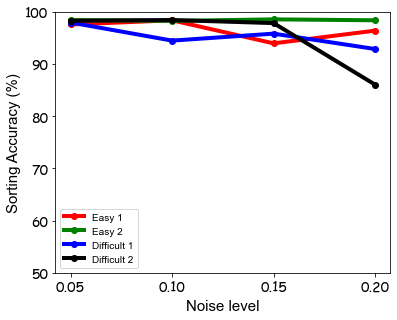

In [16]:
plt.figure(figsize=(6,4.8))
noise= [0.05,0.1,0.15,0.2]
titles = ['Easy 1','Easy 2', 'Difficult 1','Difficult 2']

for i in range(4):
    plt.plot(noise,values[:,i]*100,color = 'rgbk'[i],marker='o',markersize=6,linewidth = '4',label=titles[i])
plt.ylim(50,100)
plt.xticks(noise,size = 14)
plt.yticks(size = 14)
plt.xlabel('Noise level',fontsize=15,fontname="Arial")
plt.ylabel('Sorting Accuracy (%)',fontsize=15,fontname="Arial")
plt.legend(loc='lower left',prop={'family': 'Arial'})
